In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
root=Path('data')
root.mkdir(exist_ok=True)
path=root / "concertriccir2.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df

,x,y,lables
0,-3.950,2.740,1.0
1,0.150,-2.160,1.0
2,-1.670,-0.942,1.0
3,2.560,-1.850,1.0
4,-1.720,3.460,1.0
...,...,...,...
494,2.180,2.980,1.0
495,1.780,2.870,1.0
496,0.894,3.070,0.0
497,0.849,3.880,0.0


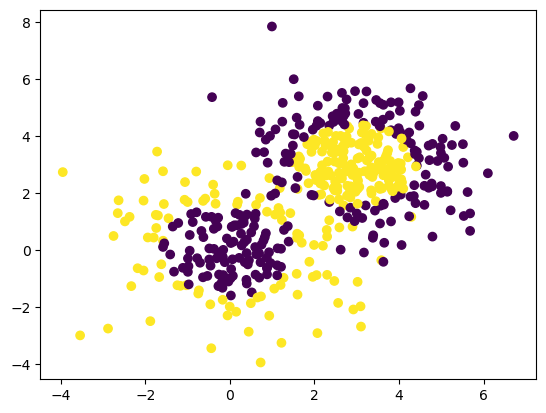

In [5]:
plt.scatter(df['x'],df['y'],c=df['lables'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [8]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=2))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233 (932.00 B)

 Trainable params: 233 (932.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
%%time
history1 = model.fit(X,y,epochs=500,validation_split=0.2,verbose=0)

CPU times: total: 48.1 s
Wall time: 34.9 s


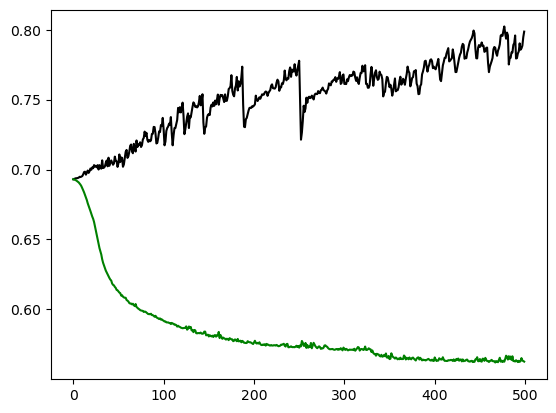

In [11]:
plt.plot(history1.history['val_loss'],color='black')
plt.plot(history1.history['loss'],color='green')

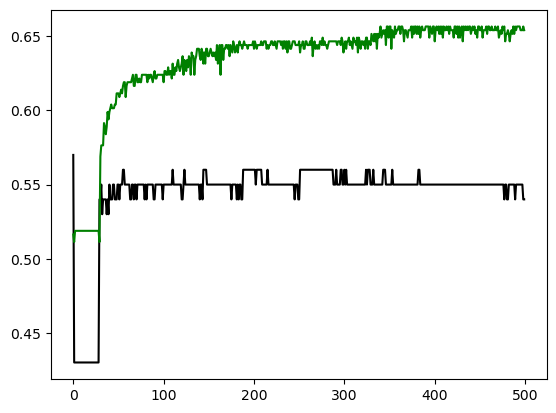

In [12]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history1.history['accuracy'],color='green')

In [13]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 518us/step


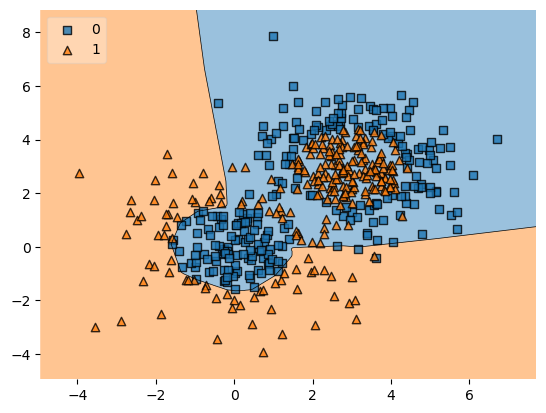

In [14]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.show()

#  BatchNormalization

In [15]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329 (1.29 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 48 (192.00 B)

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
%%time
history2 = model.fit(X,y,epochs=500,validation_split=0.2,verbose=0)

CPU times: total: 52 s
Wall time: 37 s


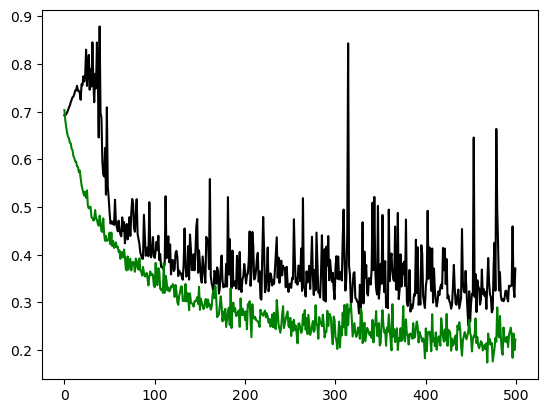

In [18]:
plt.plot(history2.history['val_loss'],color='black')
plt.plot(history2.history['loss'],color='green')

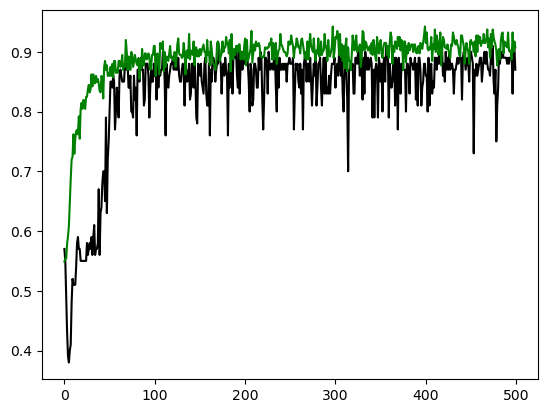

In [19]:
plt.plot(history2.history['val_accuracy'],color='black')
plt.plot(history2.history['accuracy'],color='green')

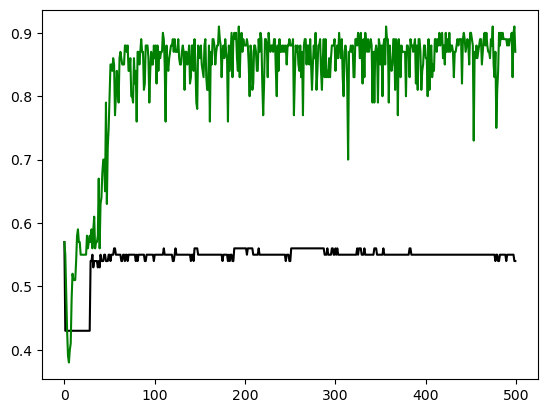

In [20]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 600us/step


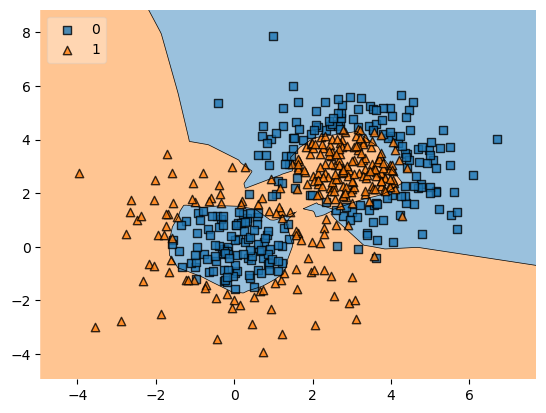

In [21]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.show()